### 대구도시공사_영구임대아파트 입주자 퇴거여부 예측 데이터셋
출처: https://www.data.go.kr/data/15094266/fileData.do

### 캐글 프라이빗 경진대회 베이스 코드
- 베이스 코드는 참가자 분들을 위해 데이터 불러오기, 데이터 전처리, 모델 학습, 결과물 제출까지의 방법을 제공합니다.
- 베이스 코드를 그대로 사용하지 마시고, 본인만의 데이터 전처리와 모델학습 그리고 결과 제출을 해주시길 바랍니다.

In [1]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=8d6b7338f9d9688b007e53288c886681ed49bc7505073870e26beea034a1f892
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#본인의 파일 경로로 지정
train_data = pd.read_csv('../input/cnu-ml/train.csv')
test_data = pd.read_csv('../input/cnu-ml/test.csv')

In [4]:
#test 데이터에는 예측해야할 "move_out(퇴거여부)"가 없는 데이터 -> 이를 예측하여 결과 파일로 캐글에 제출해야함!
print(train_data)
print(test_data)

          id     순번 계약구분  재계약횟수  거주개월    아파트 이름  아파트 ID  아파트 평점  호실고유번호   층  \
0      61187   9167   해지      3    75     용지아파트       2       7   61188   9   
1      70016  10398   유효     10   222     용지아파트       2       7   70016   7   
2      52239   7859   유효      3    80     용지아파트       2       7   52233   2   
3      85470  12689   유효     10   222  지산5단지아파트       3       8   85460   6   
4       7941   1161   해지      7   157    비둘기아파트       1       5    4750   8   
...      ...    ...  ...    ...   ...       ...     ...     ...     ...  ..   
60827  68464  10174   유효     11   241     용지아파트       2       7   68457  12   
60828  43649   6574   유효     10   222     용지아파트       2       7   38827   6   
60829   5864    853   해지      4    88    비둘기아파트       1       5    2669  12   
60830  22552   3361   유효     10   234    비둘기아파트       1       5   22543   1   
60831  22858   3407   해지      4    94    비둘기아파트       1       5   22852   3   

       ...    퇴거연도  거주연도   월세(원)    보증금(원)  대표나이  나

In [5]:
#데이터 결측치 확인
print("Train Data 결측치 확인: \n", train_data.isnull().sum())
print("-------------"*8)
print("Test Data 결측치 확인: \n", test_data.isnull().sum())

Train Data 결측치 확인: 
 id              0
순번              0
계약구분            0
재계약횟수           0
거주개월            0
아파트 이름          0
아파트 ID          0
아파트 평점          0
호실고유번호          0
층               0
평형대             0
계약자고유번호         0
계약서고유번호         0
입주연도            0
퇴거연도        42799
거주연도            0
월세(원)           0
보증금(원)          0
대표나이            0
나이              0
성별              0
결혼여부            0
거주자 수           0
move_out        0
dtype: int64
--------------------------------------------------------------------------------------------------------
Test Data 결측치 확인: 
 id             0
순번             0
계약구분           0
재계약횟수          0
거주개월           0
아파트 이름         0
아파트 ID         0
아파트 평점         0
호실고유번호         0
층              0
평형대            0
계약자고유번호        0
계약서고유번호        0
입주연도           0
퇴거연도       18343
거주연도           0
월세(원)          0
보증금(원)         0
대표나이           0
나이             0
성별             0
결혼여부           0
거주자 수          0
dtype: int64


### 데이터 전처리  
  
- 베이스 코드에서는 간단하게 결측치가 있는 "퇴거연도" column을 drop하겠습니다.

In [6]:
#베이스 코드에서는 결측치가 많은 "퇴거연도" 컬럼을 drop 하기로 함!
#이게 정답은 아니고, 결측치 처리 기법은 여러 기법이 있으므로 다양한 시도를 해볼 것을 추천

train_data = train_data.drop(['퇴거연도'], axis='columns')
test_data = test_data.drop(['퇴거연도'], axis='columns')

In [7]:
#퇴거연도가 drop되었음을 확인
#'계약구분','아파트 이름', '성별', '결혼여부'는 데이터가 문자열임을 확인할 수 있고 추후 이를 인코딩해주는 과정이 필요함
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60832 entries, 0 to 60831
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        60832 non-null  int64 
 1   순번        60832 non-null  int64 
 2   계약구분      60832 non-null  object
 3   재계약횟수     60832 non-null  int64 
 4   거주개월      60832 non-null  int64 
 5   아파트 이름    60832 non-null  object
 6   아파트 ID    60832 non-null  int64 
 7   아파트 평점    60832 non-null  int64 
 8   호실고유번호    60832 non-null  int64 
 9   층         60832 non-null  int64 
 10  평형대       60832 non-null  int64 
 11  계약자고유번호   60832 non-null  int64 
 12  계약서고유번호   60832 non-null  int64 
 13  입주연도      60832 non-null  int64 
 14  거주연도      60832 non-null  int64 
 15  월세(원)     60832 non-null  int64 
 16  보증금(원)    60832 non-null  int64 
 17  대표나이      60832 non-null  int64 
 18  나이        60832 non-null  int64 
 19  성별        60832 non-null  object
 20  결혼여부      60832 non-null  object
 21  거주자 수     60

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26072 entries, 0 to 26071
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       26072 non-null  int64 
 1   순번       26072 non-null  int64 
 2   계약구분     26072 non-null  object
 3   재계약횟수    26072 non-null  int64 
 4   거주개월     26072 non-null  int64 
 5   아파트 이름   26072 non-null  object
 6   아파트 ID   26072 non-null  int64 
 7   아파트 평점   26072 non-null  int64 
 8   호실고유번호   26072 non-null  int64 
 9   층        26072 non-null  int64 
 10  평형대      26072 non-null  int64 
 11  계약자고유번호  26072 non-null  int64 
 12  계약서고유번호  26072 non-null  int64 
 13  입주연도     26072 non-null  int64 
 14  거주연도     26072 non-null  int64 
 15  월세(원)    26072 non-null  int64 
 16  보증금(원)   26072 non-null  int64 
 17  대표나이     26072 non-null  int64 
 18  나이       26072 non-null  int64 
 19  성별       26072 non-null  object
 20  결혼여부     26072 non-null  object
 21  거주자 수    26072 non-null  int64 
dty

In [9]:
# 0:퇴거 / 1:미퇴거
train_data['move_out']

0        1
1        1
2        1
3        1
4        0
        ..
60827    1
60828    1
60829    0
60830    1
60831    0
Name: move_out, Length: 60832, dtype: int64

In [10]:
#불균형 데이터셋임을 확인할 수 있음
train_data['move_out'].value_counts()

1    57882
0     2950
Name: move_out, dtype: int64

<AxesSubplot:>

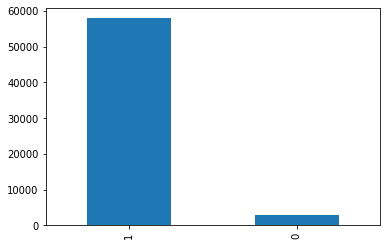

In [11]:
#시각화
train_data['move_out'].value_counts().plot.bar()

In [12]:
train_data['계약구분'].value_counts()

유효    42799
해지    18033
Name: 계약구분, dtype: int64

In [13]:
train_data['아파트 이름'].value_counts()

비둘기아파트      25228
용지아파트       23792
지산5단지아파트     9591
까치아파트        1329
강남아파트         892
Name: 아파트 이름, dtype: int64

In [14]:
train_data['성별'].value_counts()

여    35812
남    25020
Name: 성별, dtype: int64

In [15]:
train_data['결혼여부'].value_counts()

미혼    52013
기혼     8819
Name: 결혼여부, dtype: int64

### get_dummies()
- pandas에서는 get_dummies() 함수를 사용해 데이터를 매우 쉽게 인코딩 가능
- 객체 타입이나 범주형을 가진 열을 자동으로 변환해줌

In [16]:
#위의 4개의 변수는 "범주형 변수"로 보이므로, get_dummies() 함수 사용하여 전처리
#drop_first=True 옵션으로 가변수의 첫번째 변수를 자동 삭제하여 가변수 함정(dummy trap) 방지

print("Train Data 원본:\n", list(train_data.columns), "\n")
train_data = pd.get_dummies(train_data, drop_first=True)
print("get_dummies 후의 특성:\n", list(train_data.columns))

print("---------------------------------------------------------")

print("테스트 데이터 원본 특성:\n", list(test_data.columns), "\n")
test_data = pd.get_dummies(test_data, drop_first=True)
print("get_dummies 후의 특성:\n", list(test_data.columns))

Train Data 원본:
 ['id', '순번', '계약구분', '재계약횟수', '거주개월', '아파트 이름', '아파트 ID', '아파트 평점', '호실고유번호', '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수', 'move_out'] 

get_dummies 후의 특성:
 ['id', '순번', '재계약횟수', '거주개월', '아파트 ID', '아파트 평점', '호실고유번호', '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '거주자 수', 'move_out', '계약구분_해지', '아파트 이름_까치아파트', '아파트 이름_비둘기아파트', '아파트 이름_용지아파트', '아파트 이름_지산5단지아파트', '성별_여', '결혼여부_미혼']
---------------------------------------------------------
테스트 데이터 원본 특성:
 ['id', '순번', '계약구분', '재계약횟수', '거주개월', '아파트 이름', '아파트 ID', '아파트 평점', '호실고유번호', '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수'] 

get_dummies 후의 특성:
 ['id', '순번', '재계약횟수', '거주개월', '아파트 ID', '아파트 평점', '호실고유번호', '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '거주자 수', '계약구분_해지', '아파트 이름_까치아파트', '아파트 이름_비둘기아파트', '아파트 이름_용지아파트', '아파트 이름_지산5단

In [17]:
train_data.all

<bound method NDFrame._add_numeric_operations.<locals>.all of           id     순번  재계약횟수  거주개월  아파트 ID  아파트 평점  호실고유번호   층  평형대  계약자고유번호  \
0      61187   9167      3    75       2       7   61188   9   12    39791   
1      70016  10398     10   222       2       7   70016   7   12    35240   
2      52239   7859      3    80       2       7   52233   2   12    47631   
3      85470  12689     10   222       3       8   85460   6   19     5959   
4       7941   1161      7   157       1       5    4750   8   19    51081   
...      ...    ...    ...   ...     ...     ...     ...  ..  ...      ...   
60827  68464  10174     11   241       2       7   68457  12   12    20968   
60828  43649   6574     10   222       2       7   38827   6   12    19359   
60829   5864    853      4    88       1       5    2669  12   12    79320   
60830  22552   3361     10   234       1       5   22543   1   12    69387   
60831  22858   3407      4    94       1       5   22852   3   12    75661   

 

In [18]:
test_data.all

<bound method NDFrame._add_numeric_operations.<locals>.all of           id     순번  재계약횟수  거주개월  아파트 ID  아파트 평점  호실고유번호   층  평형대  계약자고유번호  \
0      77315  11572      5   106       3       8   77315   6   12     2414   
1       9515   1387      8   186       1       5    6460   1   12    61360   
2       1668    231     10   222       4      10    7227   4   15    14166   
3      57273   8567      7   156       2       7   57271  13   12    42576   
4      19049   2817      3    79       1       5   19042   3   12    81873   
...      ...    ...    ...   ...     ...     ...     ...  ..  ...      ...   
26067  81241  12110      7   162       3       8   81236  11   12    10828   
26068  83076  12351      8   192       3       8   83071   6   19     9664   
26069  25820   3846     10   234       1       5   25810  14   12    69592   
26070  36133   5417     10   244       1       5   41721  14   19    70613   
26071    680     92      9   214       5       7   16356   7   15    16011   

 

In [19]:
#unit8 : 부호 없는 8비트 정수형
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60832 entries, 0 to 60831
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               60832 non-null  int64
 1   순번               60832 non-null  int64
 2   재계약횟수            60832 non-null  int64
 3   거주개월             60832 non-null  int64
 4   아파트 ID           60832 non-null  int64
 5   아파트 평점           60832 non-null  int64
 6   호실고유번호           60832 non-null  int64
 7   층                60832 non-null  int64
 8   평형대              60832 non-null  int64
 9   계약자고유번호          60832 non-null  int64
 10  계약서고유번호          60832 non-null  int64
 11  입주연도             60832 non-null  int64
 12  거주연도             60832 non-null  int64
 13  월세(원)            60832 non-null  int64
 14  보증금(원)           60832 non-null  int64
 15  대표나이             60832 non-null  int64
 16  나이               60832 non-null  int64
 17  거주자 수            60832 non-null  int64
 18  move_o

In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26072 entries, 0 to 26071
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               26072 non-null  int64
 1   순번               26072 non-null  int64
 2   재계약횟수            26072 non-null  int64
 3   거주개월             26072 non-null  int64
 4   아파트 ID           26072 non-null  int64
 5   아파트 평점           26072 non-null  int64
 6   호실고유번호           26072 non-null  int64
 7   층                26072 non-null  int64
 8   평형대              26072 non-null  int64
 9   계약자고유번호          26072 non-null  int64
 10  계약서고유번호          26072 non-null  int64
 11  입주연도             26072 non-null  int64
 12  거주연도             26072 non-null  int64
 13  월세(원)            26072 non-null  int64
 14  보증금(원)           26072 non-null  int64
 15  대표나이             26072 non-null  int64
 16  나이               26072 non-null  int64
 17  거주자 수            26072 non-null  int64
 18  계약구분_해

<AxesSubplot:>

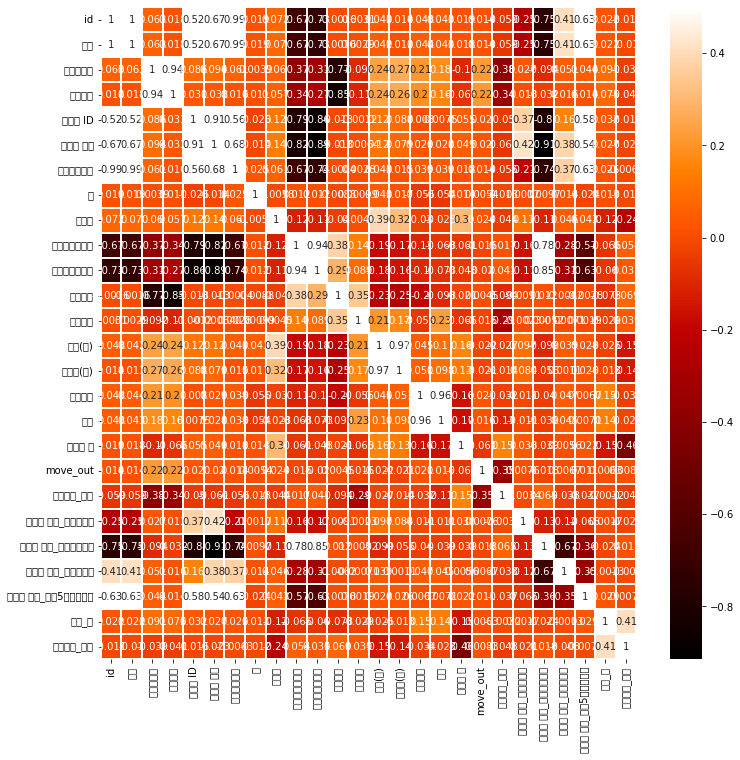

In [21]:
#상관관계를 확인할 수 있는 히트맵! 해석은 스스로하시도록 따로 추가하지 않겠습니다.

#한글이 깨지는 경우 -> 설치된 한글 폰트를 지정해주면 됩니다.
plt.rcParams['font.family'] = 'Malgun Gothic' # For Windows
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat,
            linecolor='white', annot=True)

### 검증 데이터로 분리
- 베이스 코드에는 모델의 성능을 비교해보기 위해  train 데이터에서 일부를 validation 데이터로 나눠서 진행하겠습니다.(의무사항 아님)

In [22]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train_data, test_size = 0.2, random_state=2022, shuffle=True)

In [23]:
print(train_data.shape)
print(val_data.shape)

(48665, 26)
(12167, 26)


In [24]:
X_train = train_data.drop(['move_out'], axis = 1)
X_val = val_data.drop(['move_out'], axis = 1)
X_test = test_data

y_train = train_data['move_out']
y_val = val_data['move_out']


print("X_train의 shape: ", X_train.shape)
print("X_val의 shape: ", X_val.shape)
print("X_test의 shape: ", X_test.shape)
print("\t")
print("y_train의 shape: ", y_train.shape)
print("y_val의 shape: ", y_val.shape)

X_train의 shape:  (48665, 25)
X_val의 shape:  (12167, 25)
X_test의 shape:  (26072, 25)
	
y_train의 shape:  (48665,)
y_val의 shape:  (12167,)


In [25]:
print(X_train)
print(X_val)
print(X_test)
print(y_train)
print(y_val)

          id     순번  재계약횟수  거주개월  아파트 ID  아파트 평점  호실고유번호   층  평형대  계약자고유번호  \
56363  28645   4280     10   234       1       5   28639  10   12    54657   
15947  37104   5572      9   215       1       5   43454   4   12    66621   
58296  83814  12456     10   222       3       8   83809  10   15     7773   
45492  23327   3479      7   171       1       5   23320   5   12    74758   
21027  71005  10534      4    84       2       7   70998  13   12    47162   
...      ...    ...    ...   ...     ...     ...     ...  ..  ...      ...   
46769  51975   7822      3    64       2       7   51976  15   12    19065   
37488  42753   6437      9   215       2       7   36826  15   19    30294   
16557  76600  11466      9   207       3       8   76589   3   12     8983   
1244   57507   8595      9   203       2       7   57496  15   12    38381   
21373  19180   2839      2    55       1       5   19172   3   12    83874   

       ...  대표나이  나이  거주자 수  계약구분_해지  아파트 이름_까치아파트  아파트 이름_비둘기아

### 모델 학습
- 베이스라인 모델은 k-NN 입니다.
- 베이스라인 모델과 다른 모델 또는 파라미터 조정을 하여 모델을 학습하시기 바랍니다.   


**(동일한 코드 사용 금지 = 꼭, 본인이 파라미터를 조정하면서 모델의 성능을 높여보려고 노력할 것을 의미함)**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

### 모델 성능 평가
- 이번 기계학습 경진대회 평가방식은 "AUC(Area Under the ROC Curve)" 입니다.
- AUC 값의 범위는 0~1이며 값이 클수록 예측의 정확도가 높다고 할 수 있습니다.
- 불균형한 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표입니다.

In [27]:
from sklearn.metrics import roc_auc_score

print('Train AUC = %.4f' % roc_auc_score(y_train, knn_clf.predict_proba(X_train)[:,1]))
print('Val AUC = %.4f' % roc_auc_score(y_val, knn_clf.predict_proba(X_val)[:,1]))

Train AUC = 1.0000
Val AUC = 0.5148


- **다른 평가지표를 사용하여, 모델의 성능을 확인해볼 수 있습니다.**

In [28]:
#Confustion Matrix를 보면 아시겠지만, 이번 Task의 핵심은 불균형 데이터셋이며, 이를 어떻게 성능을 높일지? 입니다.

from sklearn.metrics import confusion_matrix, classification_report
import mglearn
import matplotlib.pyplot as plt

y_pred = knn_clf.predict(X_val)

confusion = confusion_matrix(y_val, y_pred)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[   11   588]
 [  280 11288]]
              precision    recall  f1-score   support

           0       0.04      0.02      0.02       599
           1       0.95      0.98      0.96     11568

    accuracy                           0.93     12167
   macro avg       0.49      0.50      0.49     12167
weighted avg       0.91      0.93      0.92     12167



### 캐글 submission 방법   

- 제공해드린 Test 데이터에 대한 submission을 제출해야합니다.
- Test 데이터를 보시면, id 컬럼이 있는 것을 확인할 수 있습니다.
- 각 id에 해당하는 move_out(퇴거여부)을 예측하고 결과로 제출해주시면 됩니다.

In [29]:
test_predicted = knn_clf.predict(X_test)

In [30]:
sample_sub = pd.DataFrame({'id': X_test['id'], 'move_out': test_predicted})

In [31]:
sample_sub

,id,move_out
0,77315,1
1,9515,1
2,1668,1
3,57273,1
4,19049,1
...,...,...
26067,81241,1
26068,83076,1
26069,25820,1
26070,36133,1


In [32]:
sample_sub.to_csv("baseline_submission.csv", index=False)